### Titanic Survival Prediction: 
This is a classic machine learning project that's great for beginners. You'll work with a dataset of Titanic passengers to predict who survived. This project helps you practice data cleaning, exploratory data analysis (EDA), and building a simple classification model.

# 1. Project Setup and Data Loading
The first step is to import the necessary libraries and load the dataset. The Titanic dataset is available on Kaggle. You'll typically have two files: train.csv (for training your model) and test.csv (for making predictions).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# loading datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
# display first two rows to understand the data 

print(train_df.head(50))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

# 2. Exploratory Data Analysis (EDA)
Before building a model, it's crucial to understand the data. This involves checking for missing values, understanding the distribution of features, and visualizing relationships.

In [7]:
# check for missing values

print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


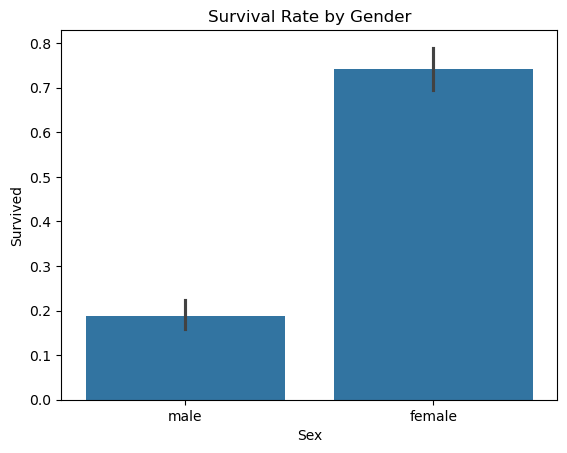

In [8]:
# visualizing survival rate by 'sex'

sns.barplot(x = 'Sex', y = 'Survived', data = train_df)
plt.title('Survival Rate by Gender')
plt.show()

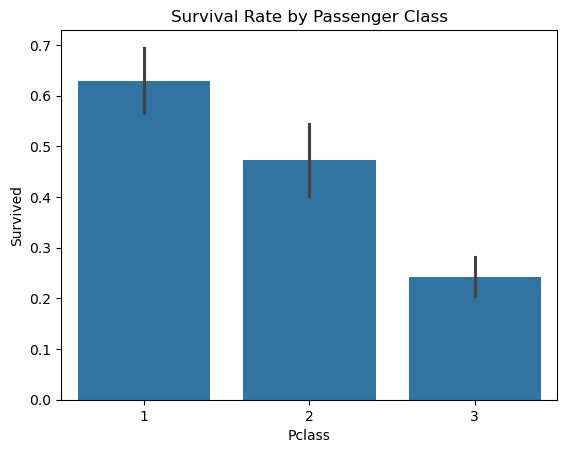

In [9]:
# visualizing survival rate by 'pclass' (Passanger Class)

sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 3. Data Cleaning and Feature Engineering
Data in the real world is messy. You'll need to handle missing values, convert categorical data into a numerical format, and create new features that could improve your model's performance.

In [25]:
# handling missing 'Age' values by fillng it with median

train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

# handling missing 'Embarke' values by filling it wiht mode

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

# handling missing 'Fare' values in the test set filling it with median

# This is the correct code
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

/var/folders/lt/c615nwld1fd_460g13mry6sh0000gn/T/ipykernel_4775/666958389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
/var/folders/lt/c615nwld1fd_460g13mry6sh0000gn/T/ipykernel_4775/666958389.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [27]:
# convert 'sex' to numerical values

train_df['Sex'] = train_df['Sex'].map({'male' : 0, 'female' : 1})
test_df['Sex'] = test_df['Sex'].map({'male' : 0, 'female' : 1})

In [29]:
# create a 'FamilySize' feature

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [31]:
# One-hot encode the 'Embarked' and 'Pclass' features

train_df = pd.get_dummies(train_df, columns = ['Embarked', 'Pclass'], drop_first = True)
test_df = pd.get_dummies(test_df, columns = ['Embarked', 'Pclass'], drop_first = True)

In [33]:
# dropping columns that are not needed for the model

train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis = 1, inplace = True)
test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis = 1, inplace = True)

# 4. Model Training and Evaluation
With the data ready, you can now train a machine learning model. A Random Forest Classifier is a good choice for this type of problem as it often performs well out-of-the-box.

In [36]:
# define features (X) and target (y)
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

# Split data into 'Training' and 'Validation' sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train the Random Forest Model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# make predictions on the validation set and evaluate
val_preds = model.predict(X_val)
accuracy = accuracy_score(y_val, val_preds)
print(f'Model Accuracy on Validation Set : {accuracy :.2f}')

Model Accuracy on Validation Set : 0.82


# 5. Final Predictions and Submission File

In [39]:
# Store PassengerId from the original test file
test_passenger_ids = pd.read_csv('test.csv')['PassengerId']

# Make predictions on the test set
test_preds = model.predict(test_df.drop('PassengerId', axis = 1, errors = 'ignore'))

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_preds
})

# Save the submission file as a CSV
submission_df.to_csv('submission.csv', index = False)

print('Submission file created successfully!')

Submission file created successfully!
